In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/Practice_Session.xlsx


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from sklearn.metrics import metrics
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
task1 = pd.read_excel("/kaggle/input/Practice_Session.xlsx", sheet_name='Task1')

In [4]:
task1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
Date         59 non-null datetime64[ns]
Sales        59 non-null int64
TV           47 non-null float64
Newspaper    50 non-null float64
Radio        47 non-null float64
Outdoor      50 non-null float64
Internet     53 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 3.4 KB


In [5]:
task1.head(10)

,Date,Sales,TV,Newspaper,Radio,Outdoor,Internet
0,2009-02-01,13408,4357.0,3867.0,1234.0,3477.0,2165.0
1,2009-02-02,32091,3179.0,4362.0,1511.0,1016.0,1361.0
2,2009-02-03,18254,NaN,1209.0,NaN,3281.0,4626.0
3,2009-02-04,28141,NaN,1617.0,NaN,4002.0,2771.0
4,2009-02-05,39636,NaN,1750.0,NaN,2171.0,1705.0
5,2009-02-06,10581,1736.0,NaN,4236.0,2363.0,4740.0
6,2009-02-07,30396,4138.0,NaN,2690.0,2920.0,1420.0
7,2009-02-08,24860,4685.0,NaN,3917.0,1311.0,4437.0
8,2009-02-09,12668,3870.0,3949.0,4195.0,NaN,4640.0
9,2009-02-10,30117,2092.0,3441.0,3798.0,NaN,2725.0


In [6]:
task1 = task1.fillna(0)

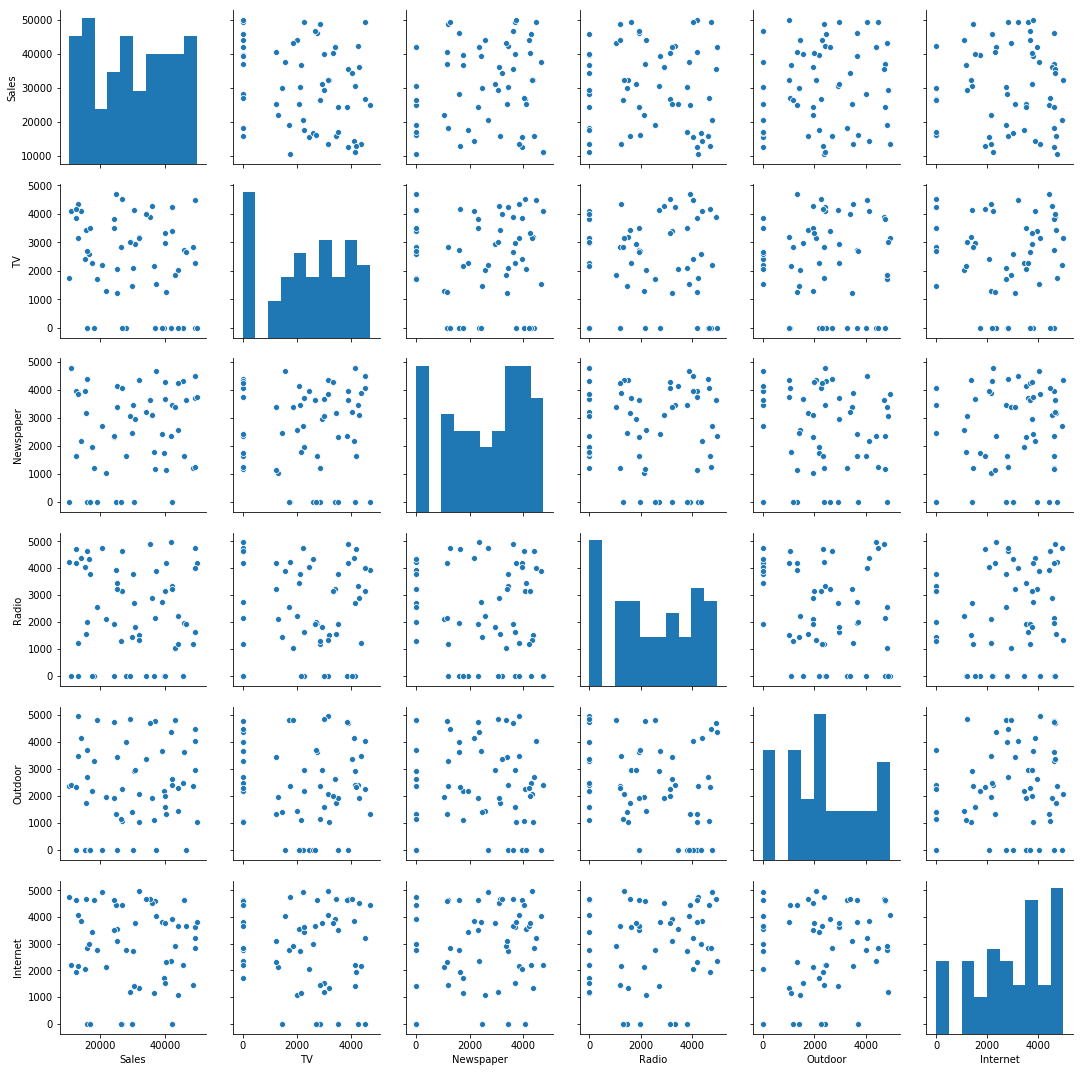

In [7]:
sns.pairplot(data=task1)
plt.show()

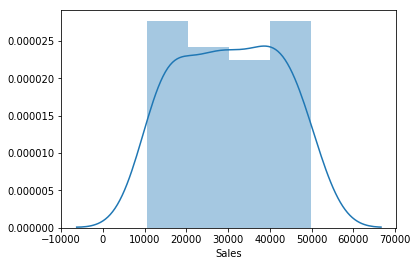

In [8]:
sns.distplot(task1['Sales'])

In [9]:
task1 = task1.drop(['Date'], axis=1)

In [10]:
task1.skew()

Sales       -0.004792
TV          -0.367502
Newspaper   -0.448773
Radio       -0.110090
Outdoor      0.017499
Internet    -0.538667
dtype: float64

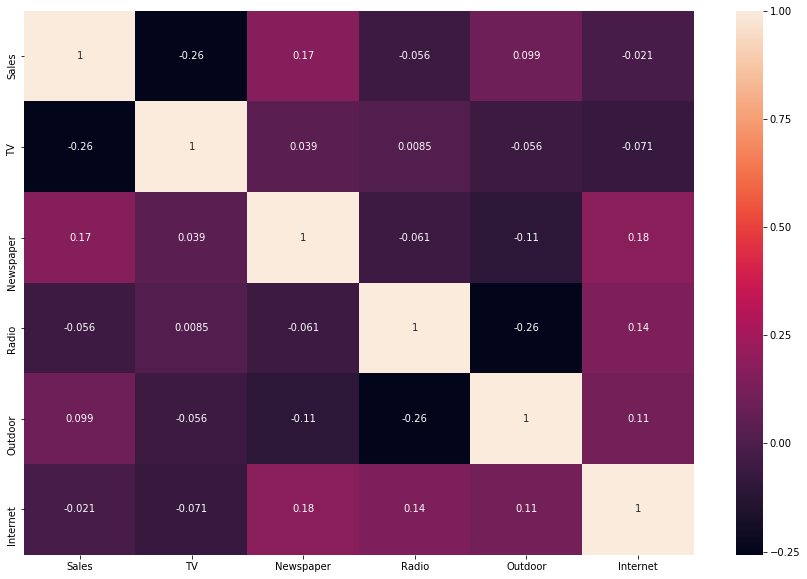

In [11]:
corr = task1.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True)
plt.show()

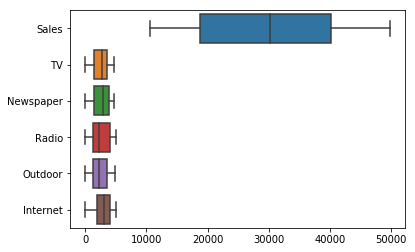

In [12]:
sns.boxplot(data=task1, orient='h')

In [13]:
task1 = task1.drop_duplicates()

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
x = task1.drop(['Sales'],axis=1)
y= task1['Sales']

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# scaler = StandardScaler().fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

lr = LinearRegression()
# lr.fit(x_train, y_train)
# y_pred_lr = lr.predict(x_test)

lr.fit(x,y)
y_pred = lr.predict(x)

print(list(zip(x.columns, lr.coef_)))

print(mean_squared_error(y, y_pred))
print(r2_score(y, y_pred))

[('TV', -2.121230498110554), ('Newspaper', 1.6576969468535507), ('Radio', 0.01597782416648519), ('Outdoor', 0.9283715240922876), ('Internet', -0.7296334819464263)]
125223651.39424111
0.11684585623721466
